# ICS 434: DATA SCIENCE FUNDAMENTALS

## Parameter Estimation: Bootstrap Confidence Interval
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Bootstrapping

* Bootstrapping consists of sampling <ins>with replacement</ins> from observed dataset

* _Basic idea_: inference about a population from a sample of the population can be modeled by resampling from the sample data and performing inference on the resampled sample

* In bootstrap resamples, the 'population' is in fact the sample



### How Bootstrapiing Used

* The bootstrap data shows us the extent of sampling variability

* it's used to, among other things, infer resampling distribution of a statistic (like the mean or median) by repeatedly sampling with replacement from the data set.


### Using Bootstrap to Estimate the Population Mean

* In the following example, we draw a sample of size 100 from Normal with $\mu=50$ and $\sigma=10$

```python
np.random.seed(22)
data = np.random.normal(50, 10, 100)
```

* Are 100 records sufficient to obtain a good measure of the population mean using bootstrap?

* What is the population's range of possible means that can be estimated from samples of this size?
  

In [33]:
data = np.random.normal(50, 1, 100)
data.mean()


44.15263117075237

In [35]:
# Given the following

np.random.seed(22)

data = np.random.normal(50, 10, 100)
data.shape[0]

100

In [36]:
data

array([49.0805008 , 35.36649347, 60.81791679, 47.60674832, 45.08870864,
       39.9772799 , 59.18821503, 38.96367899, 56.26493456, 44.38486219,
       50.28855118, 47.69232812, 55.87752215, 57.52317579, 39.41497446,
       60.55972414, 57.47750266, 60.64676588, 65.20129588, 35.11397064,
       68.59989892, 34.01386973, 43.53926387, 53.37325002, 60.46728725,
       56.2914334 , 53.63059095, 55.55749697, 39.11450468, 50.23694772,
       74.99176641, 25.09969607, 47.65137613, 49.0243654 , 41.13470658,
       48.63286762, 51.01978927, 47.49070464, 49.21187696, 39.14835834,
       55.94928451, 43.61091928, 38.92163142, 71.06145756, 44.3261223 ,
       45.20050207, 30.76770144, 53.99588542, 39.51816129, 43.06121297,
       57.45339147, 55.36909995, 42.67278223, 55.5571563 , 54.32289301,
       48.64196022, 40.58893908, 54.84767363, 34.67178547, 54.0497889 ,
       50.12826125, 37.68284441, 39.46914977, 75.16221824, 29.60971496,
       50.94487309, 46.85176665, 54.90314717, 53.54976188, 59.50

In [34]:
# Selecting data from a sample
# Draw to instance from the given array 

np.random.choice([1, 2, 3], 2)

array([2, 3, 3, 3, 2, 1, 2, 1, 2, 2])

In [43]:
len(set(np.random.choice(data, 100)))

66

In [45]:
np.random.seed(22)

data = np.random.normal(50, 10, 100)

bootstrap_means = []

for i in range(10_000):
    returns_data_100_bootstrap = np.random.choice(data, 100)
    bootstrap_mean = returns_data_100_bootstrap.mean()
    bootstrap_means.append(bootstrap_mean)
    
    

In [47]:
bootstrap_means[0:100]

[50.57385448510077,
 49.53641037803769,
 50.55427621601572,
 47.29643327348919,
 48.95876521752653,
 49.92982451344803,
 47.22595130710195,
 49.98014167201929,
 50.77783363049219,
 49.03002220125765,
 50.23380516658277,
 50.98130616472651,
 50.04615174675433,
 49.791136470467265,
 49.02299607565522,
 49.92917466823551,
 49.33774684843988,
 47.90850118167857,
 46.336865887675174,
 48.47666260818641,
 51.797774428855625,
 50.04999110107246,
 49.165593398521686,
 49.373480437347354,
 51.60266977893916,
 49.685622042805065,
 50.17800213807037,
 49.74520178385228,
 49.43938366278381,
 48.60245096099747,
 47.00424931864226,
 48.965304283597504,
 49.24518164949317,
 48.831126461860585,
 48.89110677512726,
 50.27456958308707,
 49.28090313955237,
 48.1960706785353,
 48.16468969687005,
 49.609700807421575,
 49.298333003814896,
 48.203765275341695,
 49.74117226410623,
 48.19076428502297,
 48.30426586607183,
 49.45124637925022,
 50.02185028748993,
 48.08138771934734,
 49.98450737056892,
 49.652422

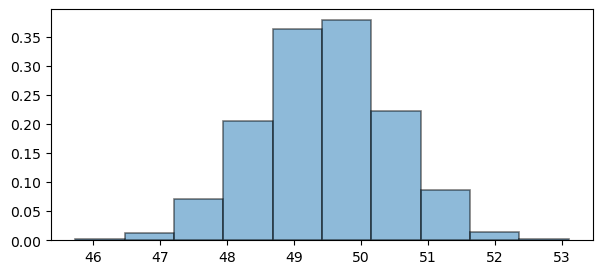

In [34]:
plt.figure(figsize=(7, 3))
_ = plt.hist(bootstrap_means, density=True, edgecolor='black', linewidth=1.2, alpha=0.5)

In [6]:
np.percentile(bootstrap_means, (2.5, 97.5))

array([47.49108953, 51.3568865 ])

### Interpreting the Bootstrap Values

* The bootstrap data shows us the extent of sampling variability

* The 95% confidence interval contains our population mean
  * Values within 95% confidence interval are not a fluke
  * We cannot discredit the fact that any of those values are possible means of the population

* Conclusion: even with only 100 samples, we can observe that population mean is included in the interval [47.49, 51.36]

### How Confident Are We in the Bootstrap Confidence Interval?

* The estimate 95% confidence interval captures the population parameter

  * Was that a fluke?

* To see how frequently the interval contains the parameter, we have to run the entire process over and over again

* We will repeat the following process a number of times (say 100 times):

  * Generate a data sample of size 100
  * Generate 10,000 bootstrap samples from the data sample
  * Generate the 95% confidence of the mean
  
* We will end up with 100 intervals, and count how many of them contain the population mean
  * How many of these 95 confidence intervals will include our mean?


In [7]:
def comput_conf_interval(data, nb_bootstrap_iters = 10_000):
    bootstrap_means = []
    for i in range(nb_bootstrap_iters):
        bootstrap_sample = np.random.choice(data, 100, replace=True)
        bootstrap_means.append(bootstrap_sample.mean())
    return np.percentile(bootstrap_means, (2.5, 97.5))
    
lower_bound = []
upper_bound = []
for i in range(100):
    data = np.random.normal(50, 10, 100)
    conf_interval = comput_conf_interval(data)
    lower_bound.append(conf_interval[0])
    upper_bound.append(conf_interval[1])

In [8]:
conf_ints_95 = pd.DataFrame({"lower": lower_bound, "upper": upper_bound})
conf_ints_95.head()

,lower,upper
0,48.857784,53.082003
1,48.448264,52.205987
2,49.248013,52.893485
3,49.127204,52.737125
4,47.576569,51.452966


In [9]:
conf_ints_95.shape

(100, 2)

In [10]:
sum((conf_ints_95["lower"] < 50) & (conf_ints_95["upper"] > 50))

97

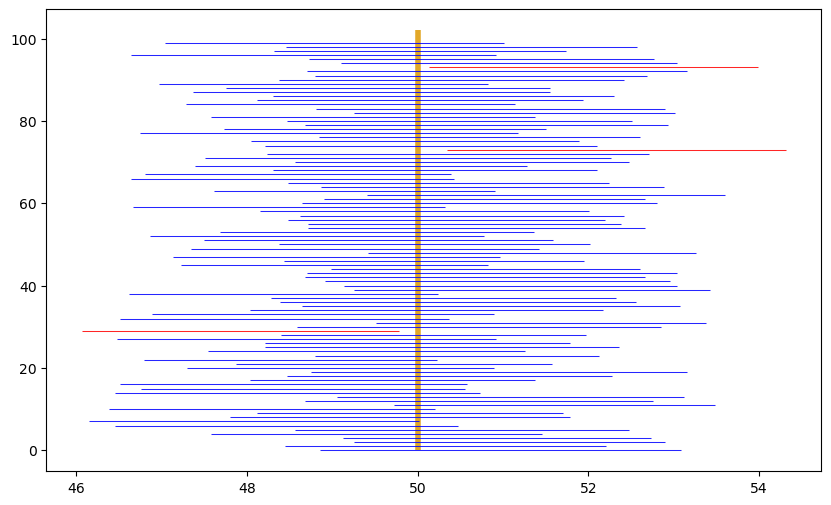

In [11]:
plt.figure(figsize=(10, 6))
plt.vlines(50, 0, 102, color="#e2a829", linewidth=4)

for i in range(100):
    c = "blue"
    if lower_bound[i] > 50 or upper_bound[i] < 50:
        c = "red"
    plt.hlines(i, lower_bound[i], upper_bound[i], color=c, alpha=0.85, linewidth=0.75)

### How Confident Are We in the Bootstrap Confidence Interval? -- Cont'd

* If an interval doesn't cover the parameter, it's a failure 
  * There are very few of them in this case
* Any method based on sampling has the possibility of being off
 * If we have a 95% confidence interval, we should expect to be wrong 5% of the time
   * We are here about statistical expectation over a long run of experiments
   *  if you were to construct confidence intervals an extremely large number of times under the same conditions, 95% of those intervals would contain the true parameter value, leaving 5% that do not.
* The beauty of methods based on random sampling is that we can quantify how often they are likely to be off



### Misinterpretations and Misunderstandings or Confidence Intervals
  * A 95% confidence interval does not mean there is a 95% chance that a given interval contains the true parameter value.
     * The probability of a wrong interval containing the data is 0. 
  * It means that 95% of such intervals constructed from repeated sampling will contain the true parameter.
  This distinction is subtle but fundamental to understanding statistical confidence.

* Once a specific interval has been calculated from a specific sample, it either does contain the true parameter or it doesn't.
*  the interval itself doesn't have a probability attached to it because it's fixed.


### The Bootstrap Confidence Interval

* Our interval of estimates is called a *95% confidence interval* for the parameter

* 95% is called the *confidence level* of the interval

* We say that we are *95% confident* that the process results in a good interval

### Why is the Bootstrap a Good Idea? 

* Similarity by transitivity
  *  By the law of averages, the distribution of the original sample is likely to resemble the population. 
  * So, the distributions of all the "resamples" are likely to resemble the original sample.
  * So the distributions of all the resamples are likely to resemble the population as well. 
* Treat the original sample as if it were the entire population.
* Draw from the sample at random **with** replacement.
  * The resample (bootstrap sample) should be of the same size as the original one.
    * Avoids any discrepencies that may be due to size alone.


<img src="https://www.dropbox.com/scl/fi/xaxy7lnz2xyktcdwi3e0e/bootstrap_pic.png?rlkey=btyevb4egdfsv1dn12c29vt7q&dl=1" alt="drawing" style="width:950px"/>

### Care in Using the Bootstrap ###

* The bootstrap is an elegant and powerful method to assess the accuracy of the estimate

 * The bootstrap uses a different approach to estimating the standard error


* What you need to know before using it:

  * Start with a large random sample

  * The Law of Averages says that this is likely to be true provided the random sample is large


* To approximate the probability distribution of a statistic, it is a good idea to replicate the resampling procedure as many times as possible

  * 10,000, in general, is a good estimate

* The bootstrap percentile method works well for estimating the population median or mean based on a large random sample

### When To Not Use the Bootstrap

* The bootstrap is not useful in the following situations:

    * The goal is to estimate the minimum or maximum value in the population, or a very low or very high percentile, or parameters that are greatly influenced by rare elements of the population
    * The probability distribution of the statistic is not roughly bell-shaped
      * Can withstand some skewness in the data
    * The original sample is very small, say less than 20 or 25
      * Sample is not representative of the population
      * Bootstrap samples are not representative of samples from the population